In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the Dataset

In [3]:
df = pd.read_csv('parkinsons.data',sep=',')

In [4]:
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.shape

(195, 24)

In [6]:
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [7]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Check for Null Values

In [8]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
df.groupby(['status']).count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


# Check for Outliers

In [10]:
columns = [
    'MDVP:Fo(Hz)',
    'MDVP:Fhi(Hz)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)',
    'MDVP:Jitter(Abs)',
    'MDVP:RAP',
    'MDVP:PPQ',
    'Jitter:DDP',
    'MDVP:Shimmer',
    'MDVP:Shimmer(dB)',
    'Shimmer:APQ3',
    'Shimmer:APQ5',
    'MDVP:APQ',
    'Shimmer:DDA',
    'NHR',
    'HNR',
    'RPDE',
    'DFA',
    'spread1',
    'spread2',
    'D2',
    'PPE'
]

In [11]:
data = pd.read_csv('parkinsons.data',sep=',')

In [12]:
data.sort_values(by=columns, ascending=True, inplace=True)

In [13]:
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
10,phon_R01_S02_5,88.333,112.240,84.072,0.00505,0.00006,0.00254,0.00330,0.00763,0.02143,...,0.03237,0.01166,21.118,1,0.611137,0.776156,-5.249770,0.391002,2.407313,0.249740
11,phon_R01_S02_6,91.904,115.871,86.292,0.00540,0.00006,0.00281,0.00336,0.00844,0.02752,...,0.04272,0.01141,21.414,1,0.583390,0.792520,-4.960234,0.363566,2.642476,0.275931
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362
78,phon_R01_S20_1,95.385,102.145,90.264,0.00608,0.00006,0.00331,0.00332,0.00994,0.03202,...,0.05408,0.01062,21.875,1,0.644954,0.779612,-5.115212,0.249494,2.017753,0.260015
81,phon_R01_S20_4,95.605,107.715,87.549,0.00702,0.00007,0.00428,0.00371,0.01283,0.03156,...,0.05377,0.01825,19.659,1,0.576084,0.778747,-5.132032,0.210458,2.232576,0.260633


In [14]:
q1 = 0
q3 = 0
IQR = 0
lower_bound = 0
upper_bound = 0

for col in columns:
    q1, q3 = np.percentile(data[col],[25,75])
    IQR = q3 - q1
    lower_bound = (q1 - (1.5 * IQR))
    upper_bound = (q3 + (1.5 * IQR))
    
    filter1 = data[col] > upper_bound
    filter2 = data[col] < lower_bound
    
    result = data[filter1 | filter2][col]
    if(len(result) > 0):
        print(col)

MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
spread1
spread2
D2
PPE


# Observations

The features MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer,,MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, spread1, spread2, D2,PPE are having outliers. 

# BoxPlots

In [15]:
columns = [
            'MDVP:Fhi(Hz)',
            'MDVP:Flo(Hz)',
            'MDVP:Jitter(%)',
            'MDVP:Jitter(Abs)',
            'MDVP:RAP',
            'MDVP:PPQ',
            'Jitter:DDP',
            'MDVP:Shimmer',
            'MDVP:Shimmer(dB)',
            'Shimmer:APQ3',
            'Shimmer:APQ5',
            'MDVP:APQ',
            'Shimmer:DDA',
            'NHR',
            'HNR',
            'spread1',
            'spread2',
            'D2',
            'PPE',
]

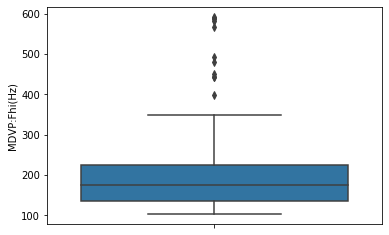

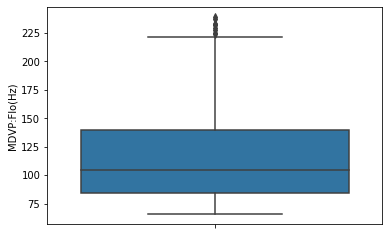

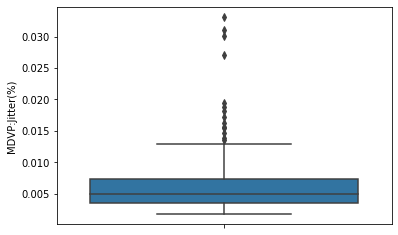

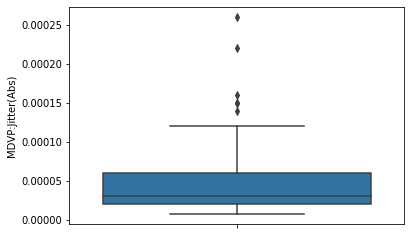

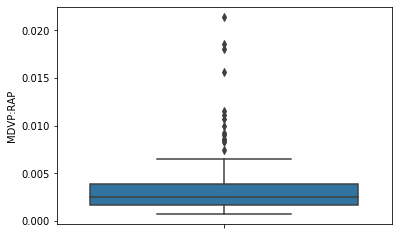

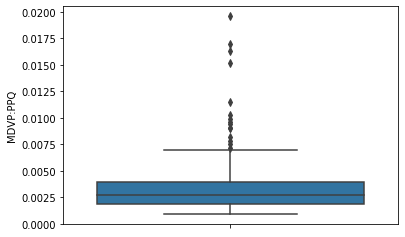

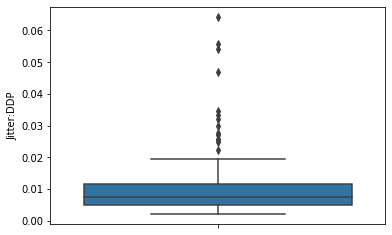

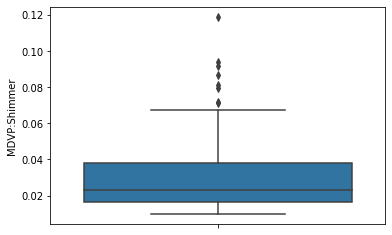

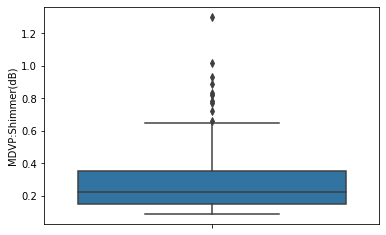

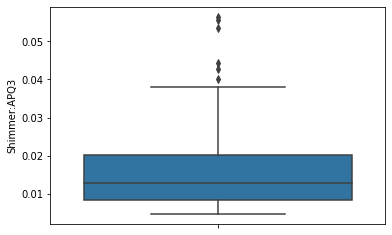

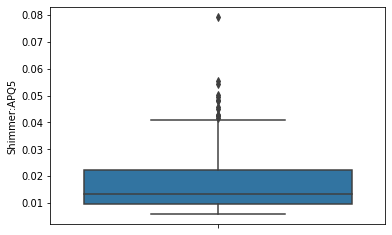

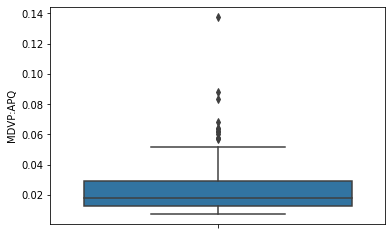

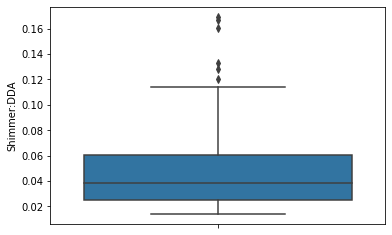

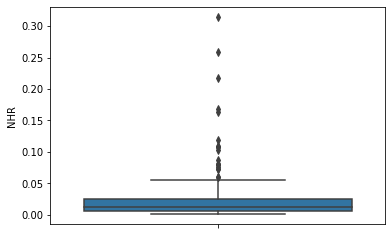

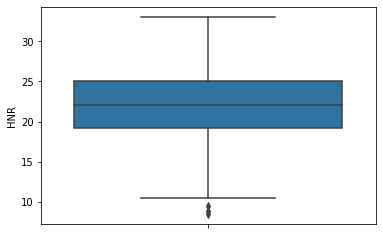

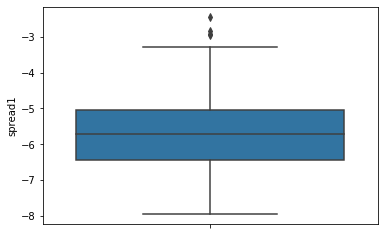

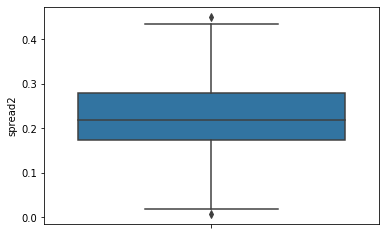

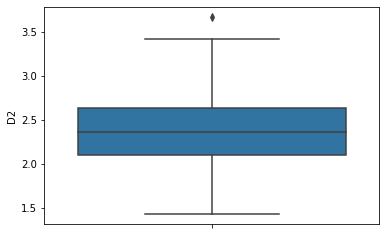

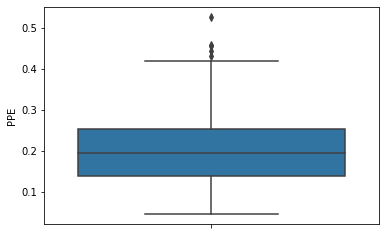

In [16]:
for col in columns:
    sns.boxplot(y=data[col])
    plt.show()

# Univariate and Bivariate Analysis

# Five point summary statisitcs

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


# Correlation

In [18]:
corr_matrix = df.corr()

corr_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


# Observations from Correlation

1. MDVP:Jitter(Abs) is highly postively correlated with MDVP:Jitter(%) which is 0.935714

2. MDVP:RAP is highly positively correlated with MDVP:Jitter(%) which is 0.990276

3. MDVP:PPQ is highly positively correlated with MDVP:Jitter(%) which is 0.974256

4. Jitter:DDP has high postive correlation with MDVP:Jitter(%) which is 0.990276

5. MDVP:Shimmer is in strong postive correlation with MDVP:Jitter(%) which is 0.769063

6. MDVP:Shimmer(dB) is in strong postive correlation with MDVP:Jitter(%) which is 0.804289

7. Shimmer:APQ3 and Shimmer:APQ5 is in strong postive correlation with MDVP:Jitter(%). The respective correlation coefficients are 0.746625 and 0.725561

8. MDVP:APQ is in strong postive correlation with MDVP:Jitter(%) which is 0.758255

9. Shimmer:DDA is in strong positive correlation with MDVP:Jitter(%) which is 0.746635

10. NHR is highly positively correlated with MDVP:Jitter(%) which is 0.906959

11. HNR is strongly negatively correlated with MDVP:Jitter(%) which is -0.728165

12. Spread1 is in strong postive correlation with MDVP:Jitter(%) which is 0.693577

13. PPE is in strong positive correlation with MDVP:Jitter(%) which is 0.721543

14. MDVP:RAP and MDVP:PPQ is highly positively correlated with MDVP:Jitter(Abs). The respective correlation coefficients are 0.922911 and 0.897778

15. Jitter:DDP is highly correlated with MDVP:Jitter(Abs) which is 0.922913

16. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, Spread1 and PPE are having strong postive correlation with MDVP:Jitter(Abs)

17. MDVP:PPQ is highly correlated with MDVP:RAP which is 0.957317

18. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are having strong postive correlation with MDVP:RAP

19. NHR is highly correlated with MDVP:RAP which is 0.919521

20. HNR is having strong negative correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:DDA and HNR

21. Jitter:DDP is highly correlated with MDVP:PPQ which is 0.957319

22. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, Spread1 are strong postive correlation with MDVP:PPQ

23. MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are postively correlated with Jitter:DDP

24. NHR is highly correlated with Jitter:DDP which is 0.919548

25. MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ are highly postively correlated with Jitter:DDP

26. MDVP:Shimmer is highly correlated with MDVP:Shimmer(dB)

27. Spread2 is postively correlated with Spread1, D2 and PPE

28. PPE is highly postively correlated with Spread1

29. PPE has strong postive correlation with MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA and NHR.

30. Every feature is either positively or negatively correlated with target feature 'status' but none of the features are having strong postive or negative correlation with target feature 'status'. But we can observe features 'Spread1', 'PPE' are having better postive correlation with target feature 'status' than other features.

# Pairplots

In [19]:
cols = [
    'MDVP:Jitter(%)',
    'MDVP:Jitter(Abs)',
    'MDVP:RAP',
    'MDVP:PPQ',
    'Jitter:DDP',
    'MDVP:Shimmer',
    'MDVP:Shimmer(dB)',
    'Shimmer:APQ3',
    'Shimmer:APQ5',
    'MDVP:APQ',
    'Shimmer:DDA',
    'NHR',
    'HNR',
    'spread1',
    'PPE'
]

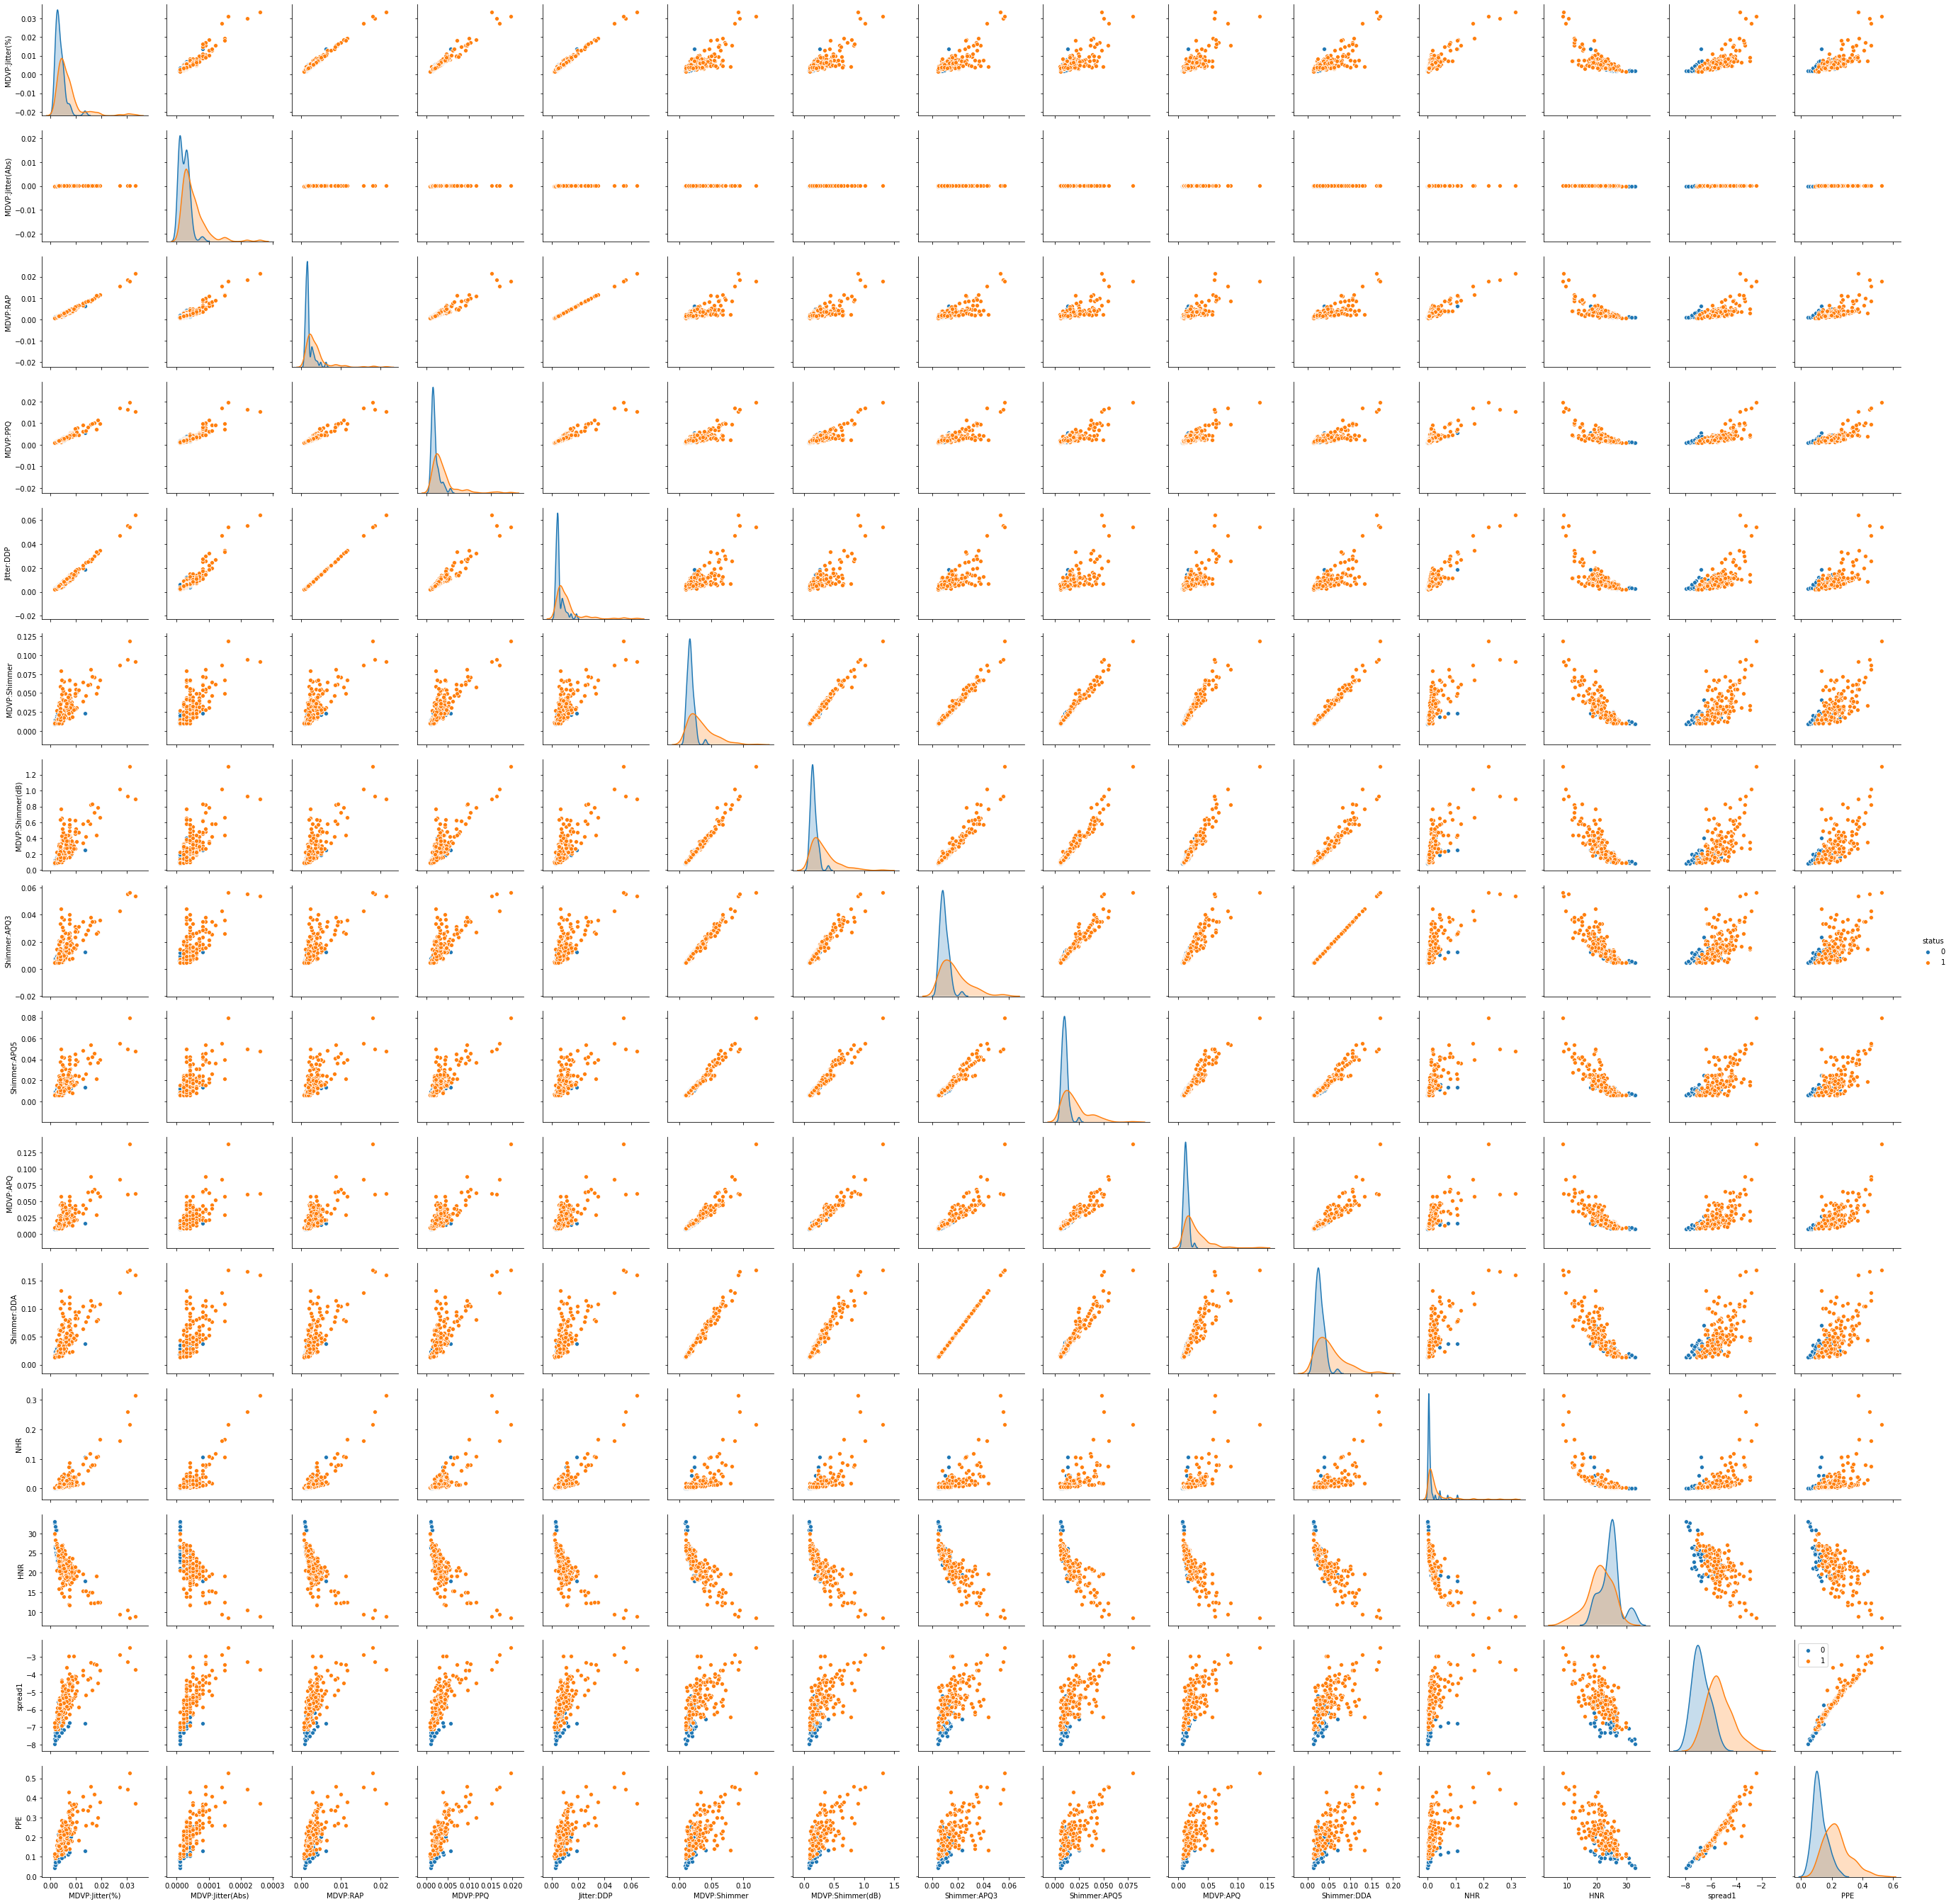

In [20]:
sns.pairplot(data=df, vars=cols, hue='status')
plt.legend()
plt.show()

From the above pairplots, we can observe linear relationship between few features

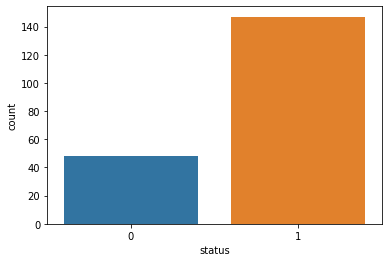

In [21]:
sns.countplot(df['status'])
plt.show()

In [22]:
df.var()

MDVP:Fo(Hz)         1.713137e+03
MDVP:Fhi(Hz)        8.370703e+03
MDVP:Flo(Hz)        1.894113e+03
MDVP:Jitter(%)      2.350440e-05
MDVP:Jitter(Abs)    1.212565e-09
MDVP:RAP            8.807685e-06
MDVP:PPQ            7.611952e-06
Jitter:DDP          7.926954e-05
MDVP:Shimmer        3.555839e-04
MDVP:Shimmer(dB)    3.797716e-02
Shimmer:APQ3        1.030867e-04
Shimmer:APQ5        1.445695e-04
MDVP:APQ            2.871919e-04
Shimmer:DDA         9.277580e-04
NHR                 1.633651e-03
HNR                 1.958739e+01
status              1.865186e-01
RPDE                1.080388e-02
DFA                 3.062054e-03
spread1             1.188553e+00
spread2             6.956521e-03
D2                  1.465351e-01
PPE                 8.121492e-03
dtype: float64

# Observations From Feature Variances

1. Feature MDVP:Jitter(Abs) is having very low variance.

2. Feature MDVP:Fhi(Hz) is having very high variance.

3. The features MDVP:Jitter(%), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are having low varaince.

# Split the Data into Train and Test

In [23]:
X = df.drop(['name','status'], axis=1)

y = df['status']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

# Create the model using “entropy” method of reducing the entropy and fit it to training data

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [26]:
model = DecisionTreeClassifier(criterion='entropy')

In [27]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.122080
MDVP:Fhi(Hz)      0.028619
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.088092
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.146941
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.031833
DFA               0.150607
spread1           0.000000
spread2           0.000000
D2                0.031082
PPE               0.400746


# Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab

In [29]:
y_predict_test = model.predict(X_test)

In [30]:
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

1.0
0.8983050847457628


In [31]:
print(metrics.confusion_matrix(y_test, y_predict_test))

[[11  1]
 [ 5 42]]


In [32]:
precision_score(y_test, y_predict_test)

0.9767441860465116

In [33]:
recall_score(y_test, y_predict_test)

0.8936170212765957

In [34]:
f1_score(y_test, y_predict_test)

0.9333333333333332

# Observations

1. The model accuracy on train dataset is 100% and on the test dataset is 86%. The model is performing well on train data but not on the test data.

2. The model precision score is high but the recall score is low.

3. Eventhough the f1-score is 90%, this is not a good model to rely on.

# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [35]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=5,random_state=7)

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [37]:
y_predict_test = model.predict(X_test)

In [38]:
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

0.9705882352941176
0.9152542372881356


In [39]:
precision_score(y_test, y_predict_test)

0.9375

In [40]:
recall_score(y_test, y_predict_test)

0.9574468085106383

In [41]:
f1_score(y_test, y_predict_test)

0.9473684210526315

# Observations From Regularization

1. When regularization parameters like max_depth = 9 and min_samples_leaf = 5, the accuracy of train dataset decreased by 3% but not a significant decrease

2. However, the accuracy of test dataset is increased by 5%.

3. The recall score is significantly increased.

4. Now the f1 score is after regularization is 95% i.e. the number of false positves and false negatives decreased after regularization parameters used.

5. The regularization parameters improved the overall performance of model in terms of accuracy, recall and f1 score

#  Implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfcl = RandomForestClassifier(criterion='entropy', random_state=7)

In [44]:
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [45]:
y_predict_test = rfcl.predict(X_test)

In [46]:
print(rfcl.score(X_train, y_train))

print(rfcl.score(X_test, y_test))

0.9926470588235294
0.9152542372881356


In [47]:
precision_score(y_test, y_predict_test)

0.9375

In [48]:
recall_score(y_test, y_predict_test)

0.9574468085106383

In [49]:
f1_score(y_test, y_predict_test)

0.9473684210526315

# Observations

1. After performing RandomForestClassifier, all the model metrics are similar to the Decision Tree model with Regularization parameters.

2. When default Random Forest Classifier is used i.e n_estimators = 10, the model accuracy on the train dataset is 99% and on the test dataset is 91%

3. The model recall score is 96% i.e. the model can able to patients with parkinsons disease and healthy with 96% accurately.

4. Also the f1-score is 95%.

Optimum number of Tree Calculation
----------------------------------------------------

In [50]:
train_accuracy = 0
test_accuracy = 0
precision = 0
recall = 0
f1score = 0

for i in range(2,11,1):
    rfcl = RandomForestClassifier(n_estimators = i, criterion='entropy', random_state=7)
    rfcl.fit(X_train, y_train)
    y_predict_test = rfcl.predict(X_test)
    
    train_accuracy = rfcl.score(X_train, y_train)
    
    test_accuracy = rfcl.score(X_test, y_test)
    
    precision = precision_score(y_test, y_predict_test)
    
    recall = recall_score(y_test, y_predict_test)
    
    f1score = f1_score(y_test, y_predict_test)
    
    print('Number Of Estimators = {}, Train Accuracy = {}, Test Accuracy = {}, Precision = {}, Recall = {}, F1Score = {}'.format(i, train_accuracy, test_accuracy, precision, recall, f1score))

Number Of Estimators = 2, Train Accuracy = 0.9558823529411765, Test Accuracy = 0.864406779661017, Precision = 0.9148936170212766, Recall = 0.9148936170212766, F1Score = 0.9148936170212766
Number Of Estimators = 3, Train Accuracy = 0.9558823529411765, Test Accuracy = 0.864406779661017, Precision = 0.8979591836734694, Recall = 0.9361702127659575, F1Score = 0.9166666666666666
Number Of Estimators = 4, Train Accuracy = 0.9705882352941176, Test Accuracy = 0.864406779661017, Precision = 0.9148936170212766, Recall = 0.9148936170212766, F1Score = 0.9148936170212766
Number Of Estimators = 5, Train Accuracy = 0.9852941176470589, Test Accuracy = 0.864406779661017, Precision = 0.8979591836734694, Recall = 0.9361702127659575, F1Score = 0.9166666666666666
Number Of Estimators = 6, Train Accuracy = 0.9779411764705882, Test Accuracy = 0.8983050847457628, Precision = 0.9361702127659575, Recall = 0.9361702127659575, F1Score = 0.9361702127659575
Number Of Estimators = 7, Train Accuracy = 0.99264705882352

# Observations

1. For n_estimators = 7, 9, 10 the accuracy score on the test dataset, precision, recall and F1 score are similar.

2. For n_estimators = 9, the accuracy score on the train dataset is 100% and for n_estimators = 7, 10 the accuracy score on the train dataset is 99%

3. The optimum number of trees for which the model is performing better are 7,9,10.